In [9]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
data=load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
df=pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
scale=StandardScaler()

scaled_df=scale.fit_transform(df)

scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [12]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(scaled_df)

In [21]:
pca_data[:,1:2]

array([[ 1.94858307e+00],
       [-3.76817174e+00],
       [-1.07517380e+00],
       [ 1.02755891e+01],
       [-1.94807157e+00],
       [ 3.94992890e+00],
       [-2.69003128e+00],
       [ 2.34024401e+00],
       [ 3.39181295e+00],
       [ 7.72717407e+00],
       [-2.65927550e+00],
       [ 6.65679266e-02],
       [ 2.70097649e+00],
       [-9.68279261e-01],
       [ 4.86108331e+00],
       [ 2.97706118e+00],
       [-1.56475773e+00],
       [ 1.41867033e+00],
       [-4.11433352e+00],
       [-1.88214954e-01],
       [ 5.72808193e-01],
       [ 1.66294990e+00],
       [ 3.30496373e+00],
       [-5.12836651e+00],
       [-1.54375229e+00],
       [ 2.01861034e+00],
       [ 2.17162512e+00],
       [-1.87655235e+00],
       [ 5.37242161e-01],
       [-1.52370502e+00],
       [-7.57177451e-01],
       [ 4.00529551e+00],
       [ 3.37536154e-01],
       [-1.13258891e+00],
       [ 7.58423243e-01],
       [-3.54355942e-01],
       [ 9.13196276e-01],
       [-1.41347312e+00],
       [-3.3

In [15]:
pca_data[:,:0]

array([], shape=(569, 0), dtype=float64)

<Axes: >

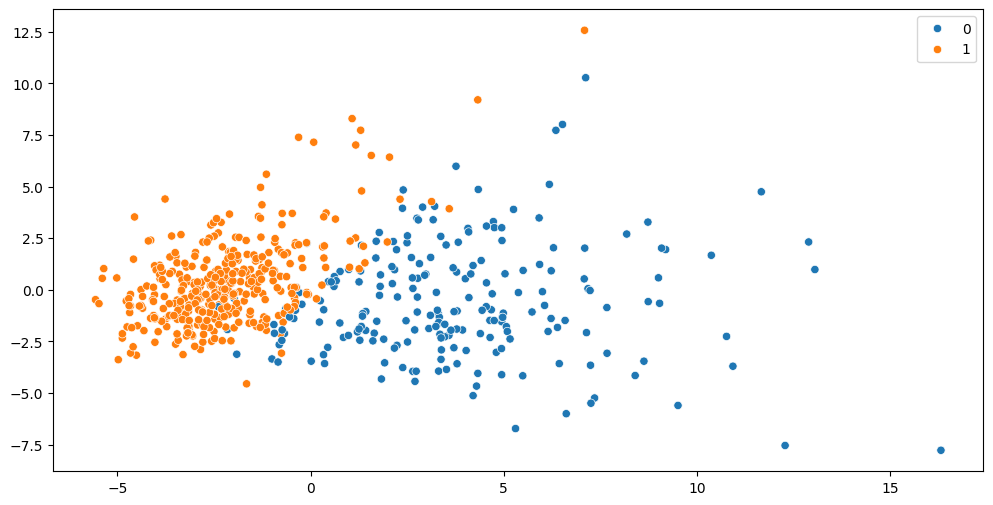

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=data["target"])

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(pca_data,data["target"],test_size=0.2,random_state=23)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf=RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pre=rf.predict(x_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [34]:
print("Accuracy:",roc_auc_score(y_test,y_pre))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pre))
print("Classification Report:",classification_report(y_test,y_pre))

Accuracy: 0.9610256410256409
Confusion Matrix:
 [[37  2]
 [ 2 73]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

